In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns;
import mglearn
sns.set()


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Linear Regression 

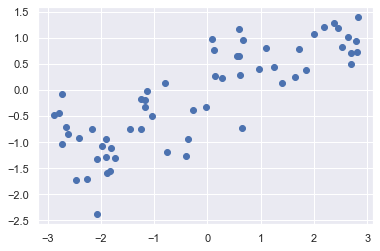

In [2]:
X, y = mglearn.datasets.make_wave(n_samples = 60)
plt.scatter(X.flatten(), y)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_

(array([0.39390555]), -0.031804343026759746)

In [4]:
'Train score: %.2f' % model.score(x_train, y_train)

'Train score: 0.67'

In [5]:
'Test score: %.2f' % model.score(x_test, y_test)

'Test score: 0.66'

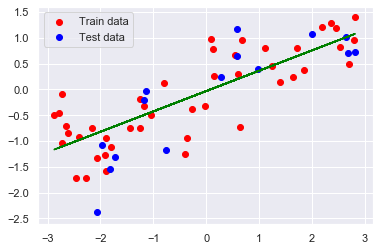

In [6]:
plt.scatter(x_train.flatten(), y_train, color = 'red', label = 'Train data')
plt.scatter(x_test.flatten(), y_test, color = 'blue', label = 'Test data')
plt.plot(x_train.flatten(), model.predict(x_train), color = 'green')
plt.legend()

# Ridge Regression

In [7]:
from mglearn.datasets import load_extended_boston
X, y = load_extended_boston()
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 42)

Linear model:

In [8]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear_model.score(x_train, y_train), linear_model.score(x_test, y_test)

(0.9448313975211593, 0.7758378393351677)

Regularization(L2 normalization):

In [9]:
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test,  y_test)

(0.8700969775259919, 0.8145421818415556)

<b>Observation:</b>Train score decreased, Test score increases => Generalize better

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


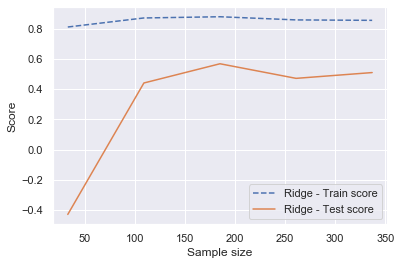

In [10]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, model_name):
    sizes, train_scores, test_scores = learning_curve(model, X, y)
    train_scores = train_scores.mean(1)
    test_scores = test_scores.mean(1)
    plt.plot(sizes, train_scores, label = '%s - Train score' % model_name, linestyle = '--')
    plt.plot(sizes, test_scores, label = '%s - Test score' % model_name)

plot_learning_curve(Ridge(), 'Ridge')
# plot_learning_curve(LinearRegression(), 'Linear Regression')
plt.xlabel('Sample size')
plt.ylabel('Score')
plt.legend()

# Lasso

<p style = 'color:teal'>
Some coefficients are <i>exactly zero</i>.This mean some features are entirely ignored by the model.This can be seen as a form of 
automatic feature selection.
</p>

In [11]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
lasso_model.score(x_train, y_train), lasso_model.score(x_test, y_test)

(0.26783778369518485, 0.2599232118344591)

In [12]:
'The number of selected feature: %d' % np.sum(lasso_model.coef_ != 0)

'The number of selected feature: 3'

We are <i>Underfitting</i><br>
<b>Strategy:</b> Descrease <code>alpha</code> and Increase <code>max_iter</code>.

In [13]:
model = Lasso(alpha = .01, max_iter = 10000)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.8864717420585476, 0.8036004116583615)

In [14]:
'The number of selected feature: %d' % (model.coef_ != 0).sum()

'The number of selected feature: 34'

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)
clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_train, y_train), clf.score(x_test, y_test)


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(0.9464285714285714, 0.8421052631578947)

<h3>Tuning Parameter: <code>C</code></h3>

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarn

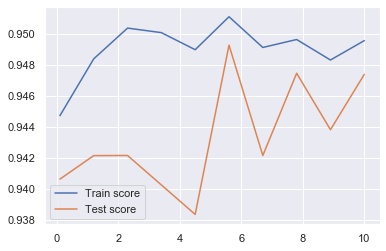

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
clf = LogisticRegression(solver = 'lbfgs')
C_values = np.linspace(.1, 10, 10)
train_scores, test_scores = validation_curve(clf, cancer.data, cancer.target, param_name = 'C', param_range = C_values, cv = 25)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(C_values, train_scores, label = 'Train score')
plt.plot(C_values, test_scores, label = 'Test score')
plt.legend(loc = 'best')

<p class = 'note'>Model selection analysis</p>

In [45]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, train_size = .8, test_size = .2, random_state = 6)
#Low value of C
clf = LogisticRegression(C = .01)
clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))

Train score: 0.93
Test score: 0.96


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
clf = LogisticRegression(C = 100)
#High value of Cb

clf.fit(x_train, y_train)
print('Train score: %.2f' % clf.score(x_train, y_train))
print('Test score: %.2f' % clf.score(x_test, y_test))

Train score: 0.96
Test score: 0.98


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
%%HTML
<style>
.note {
    font-size: 20;
    color: teal;
    font-weight: bold;
}
</style>


<h3>Important parameters:</h3>
<ul class = 'note'>
    <li><code>C</code>:inverse of <code>lambda</code></li>
    <li><code>penalty</code>: relgularization (default: l2)</li>
</ul>

# Linear Support Vector Machine

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


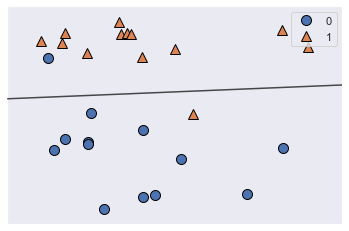

In [36]:
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
clf = LinearSVC(max_iter = 10000)
clf.fit(X, y)
mglearn.plots.plot_2d_separator(clf, X, fill = False, eps = .5, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend()

<h3>Tuning Parameter: <code>C</code></h3>
<p class = 'note'>
Large <code>C</code>: Hard margin (low bias)<br>
Small <code>C</code>: Soft margin (low variance)
</p>

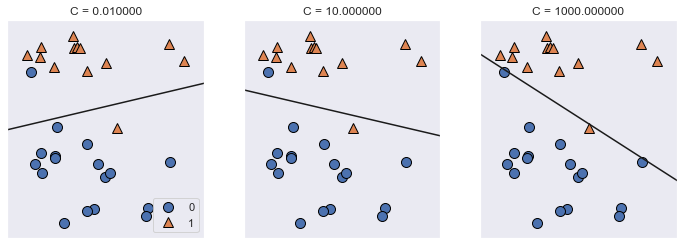

In [37]:
mglearn.plots.plot_linear_svc_regularization()

# Multi-class classification

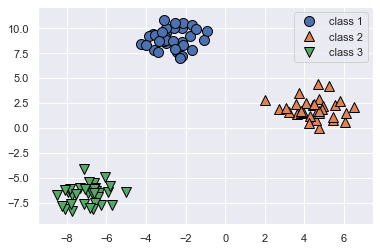

In [61]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['class 1', 'class 2', 'class 3'])

Use Linear Support Vector Machiine to classify:

In [70]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X, y)
clf.coef_, clf.intercept_
#The equation of each decision boundary:
# coef_[0] dot (x, y) + intercept_[0] = 0
# coef_[1] dot (x, y) + intercept_[1] = 0
# coef_[2] dot (x, y) = intercept_[2] = 0

(array([[-0.17492149,  0.23141228],
        [ 0.47621321, -0.06937432],
        [-0.18914016, -0.20400415]]),
 array([-1.07745412,  0.13140253, -0.08604945]))

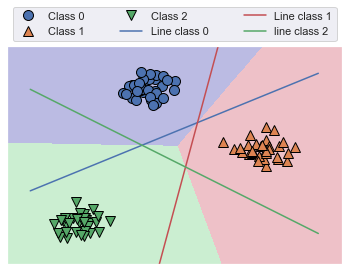

In [80]:
#a scatter plot of data
mglearn.discrete_scatter(X[:,0], X[:,1], y) 
#plot decision boundaries
lin = np.linspace(-10, 8)
for coef, intercept, color in zip(clf.coef_, clf.intercept_, ['b', 'r', 'g']): 
    plt.plot(lin, -(lin * coef[0] + intercept) / coef[1], color = color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'line class 2'], ncol = 3, loc = 'lower left', mode = 'expand', bbox_to_anchor = (0,1,1,1))
#plot boundary region
mglearn.plots.plot_2d_classification(clf, X, alpha = .2, fill = True)

## Strengths, Weakness and Parameters

In [83]:
%%HTML
<style>
.box {
    border: 1px double dodgerblue;
    padding: 5px;
}
</style>

<h3>Parameters</h3>
    <p class = 'box note'>
    Linear model: Regularization paramter: <code>alpha</code><br/>
    LogisticRegression and LinearSVC: <code>C</code>
    </p>
    <p class = 'box note'>
    Decide whether to use L1 Regularization or L2 Regularization
    </p>
    <p>If you assume that only a few of your features are important, then use <span class = 'note'>L1 Regularization</span>
    Otherwise, use <span class = 'note'>L2 Regularization.</span><br/>
    By using <span class = 'note'>L1 Regularization</span>, it's easy to intepret, 
    explain which features are important to the model.
    </p>

<h3>Strengths</h3>
<p>Fast to train, fast to predict, scale to large datasets,</p>
<p>Perform well when the <i>number of features</i> is larger the <i>number of sample</i>.</p>